<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/Logistic_Regression_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the data (ensure your CSV file name matches, e.g., 'data.csv')
data = pd.read_csv('bank-full.csv')
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
import pandas as pd
from google.colab import files

# Load the CSV file (ensure your file name is correct)
data = pd.read_csv('bank-full.csv')

# Convert the target variable 'y' from string to numeric
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# Separate features from target
features = data.drop('y', axis=1)
target = data['y']

# Convert categorical feature columns to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Combine the processed features and the target if needed
data_processed = pd.concat([features, target], axis=1)

# Define X and y for the model
X = data_processed.drop('y', axis=1)
y = data_processed['y']

# (Optional) Split the data and run logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[7754  198]
 [ 719  372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


import pandas as pd
import numpy as np
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance


# Step 2: Load the CSV file into a DataFrame
data = pd.read_excel('bank-full.xlsx')

# Step 3: Convert the target variable 'y' from categorical (e.g., "no"/"yes") to numeric
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# Step 4: Separate features from target and apply dummy encoding to feature columns only
features = data.drop('y', axis=1)
features = pd.get_dummies(features, drop_first=True)
target = data['y']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 6: Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Extract and display variable importance using coefficients
coef = model.coef_[0]
importance = pd.DataFrame({
    'Variable': features.columns,
    'Coefficient': coef,
    'Odds_Ratio': np.exp(coef)  # Transform coefficients to odds ratios
})
importance['AbsCoefficient'] = importance['Coefficient'].abs()
importance_sorted = importance.sort_values(by='AbsCoefficient', ascending=False)
print("\nVariable Importance based on Coefficients:")
print(importance_sorted[['Variable', 'Coefficient', 'Odds_Ratio']])

# (Optional) Step 9: Compute permutation importance for an alternative view
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Variable': features.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_STD': perm_importance.importances_std
}).sort_values(by='Importance_Mean', ascending=False)
print("\nPermutation Importance:")
print(perm_importance_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample Data (Replace with actual file path for large dataset)
data = pd.read_excel("bank-full.xlsx")  # Load dataset

# Drop irrelevant columns (if necessary)
data = data.drop(columns=["contact", "day", "month", "pdays", "previous"])  # Example

# Encode categorical variables
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "poutcome"]
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Encode target variable
data["y"] = LabelEncoder().fit_transform(data["y"])  # Converts 'no' to 0, 'yes' to 1

# Define features and target
X = data.drop(columns=["y"])
y = data["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Identify important variables
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print("Feature Importance:\n", feature_importance)

Accuracy: 0.8852
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043

Feature Importance:
       Feature  Coefficient
8    duration     0.993818
3   education     0.147318
2     marital     0.132180
0         age     0.059605
5     balance     0.052813
1         job     0.040007
4     default    -0.053855
7        loan    -0.235217
10   poutcome    -0.310733
9    campaign    -0.409891
6     housing    -0.550182


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-17-26a2a69da5f9>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AbsCoefficient', y='Variable', data=importance_sorted, palette='viridis')


Initial Model Confusion Matrix:
[[7754  198]
 [ 719  372]]

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043


Variable Importance based on Coefficients:
               Variable  Coefficient  AbsCoefficient
40     poutcome_success     1.809246        1.809246
27      contact_unknown    -1.206006        1.206006
41     poutcome_unknown    -1.164222        1.164222
36            month_nov    -0.721244        0.721244
32            month_jul    -0.696891        0.696891
34            month_mar     0.691558        0.691558
24          housing_yes    -0.663564        0.663564
28            month_aug    -0.642828        0.642828
25             loan_yes    -0.630197        0.630197
37

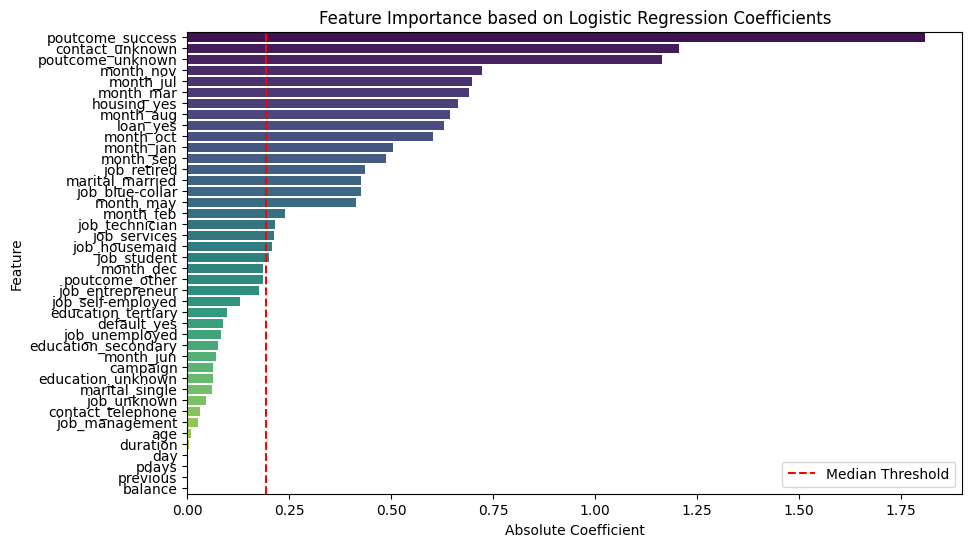

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Step 2: Load the data into a DataFrame
data = pd.read_excel('bank-full.xlsx')

# Step 3: Preprocess the data
# Convert the target variable 'y' from strings ("no"/"yes") to numeric (0/1)
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# Separate features from target and apply dummy encoding to feature columns only
features = data.drop('y', axis=1)
features = pd.get_dummies(features, drop_first=True)
target = data['y']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Fit a logistic regression model using all features
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nInitial Model Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Identify important variables using the model's coefficients
# Extract coefficients (for binary classification, model.coef_ is a 2D array with one row)
coef = model.coef_[0]
importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coef,
    'AbsCoefficient': np.abs(coef)
})
# Sort the variables by the absolute value of their coefficients in descending order
importance_sorted = importance.sort_values(by='AbsCoefficient', ascending=False)
print("\nVariable Importance based on Coefficients:")
print(importance_sorted)

# Step 7: Select important features based on a threshold.
# For demonstration, we choose the median of the absolute coefficients as the threshold.
threshold = importance['AbsCoefficient'].median()
print("\nThreshold (median of absolute coefficients):", threshold)

# Identify features with an absolute coefficient greater than or equal to the threshold.
important_features = importance[importance['AbsCoefficient'] >= threshold]['Variable'].tolist()
print("\nSelected Important Variables:")
print(important_features)

# Step 8: Drop irrelevant variables by selecting only the important features from the training and testing sets
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Step 9: Retrain the logistic regression model using only the selected features
model_selected = LogisticRegression(max_iter=1000)
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

print("\nNew Model (Selected Features) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))
print("\nNew Model (Selected Features) Classification Report:")
print(classification_report(y_test, y_pred_selected))

# Step 10: Create a chart for variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='AbsCoefficient', y='Variable', data=importance_sorted, palette='viridis')
plt.axvline(x=threshold, color='red', linestyle='--', label='Median Threshold')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.legend()
plt.show()
